In [247]:
import pandas as pd
import seaborn as sns
import numpy as np

In [248]:
df0 = pd.read_csv('../raw_data/select_2020.csv',encoding='iso-8859-2',sep=';')
df1 = pd.read_csv('../raw_data/select_2021.csv',encoding='iso-8859-2',sep=';')
df2 = pd.read_csv('../raw_data/select_2022.csv',encoding='iso-8859-2',sep=';')
df = pd.concat([df0,df1,df2])

In [249]:
df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6
...,...,...,...,...,...,...,...
289491,NJ 421,2022-05-15,Nürnberg Hbf,336,0,435,29
289492,NJ 421,2022-05-15,Rosenheim,803,49,805,49
289493,NJ 421,2022-05-15,Utrecht Centraal,1958,1,2003,0
289494,NJ 421,2022-05-15,Wörgl Hbf,837,-1,839,-1


In [250]:
df['datum'] = pd.to_datetime(df['datum'] )

In [251]:
listtoexclude = [] 
listtoexclude.append(list(df[df['adelay'] == -1].index))
listtoexclude.append(list(df[df['ddelay'] == -1].index))
listtoexclude = np.concatenate(listtoexclude)

df = df.drop(listtoexclude)

In [252]:
df.bhf.value_counts().head(20)

Frankfurt(M) Flughafen Fernbf    59411
München Hbf                      55807
Frankfurt(Main)Hbf               50236
Mannheim Hbf                     44061
Nürnberg Hbf                     42105
Düsseldorf Hbf                   40468
Würzburg Hbf                     36909
Köln Hbf                         35961
Duisburg Hbf                     34391
Stuttgart Hbf                    33384
Essen Hbf                        30775
Aschaffenburg Hbf                28211
Siegburg/Bonn                    28204
Dortmund Hbf                     27103
Augsburg Hbf                     27079
Ulm Hbf                          25889
Köln Messe/Deutz Gl.11-12        24820
München-Pasing                   21767
Karlsruhe Hbf                    16865
Erfurt Hbf                       16133
Name: bhf, dtype: int64

In [253]:
df.sort_values(['datum'])

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
28286,IC 2216,2019-12-15,Hamburg-Harburg,1501,25,1502,25
28285,IC 2216,2019-12-15,Hamburg Hbf,1512,23,1516,23
28284,IC 2216,2019-12-15,Gelsenkirchen Hbf,1212,1,1213,1
28283,IC 2216,2019-12-15,Essen Hbf,1158,0,1201,0
...,...,...,...,...,...,...,...
240667,ICE 713,2022-05-16,Bremen Hbf,941,2,944,4
28333,IC 2266,2022-05-16,Ulm Hbf,1401,0,1403,0
28332,IC 2266,2022-05-16,München-Pasing,1254,2,1255,3
100162,ICE 27,2022-05-16,Wuppertal Hbf,912,4,914,4


In [254]:
newdf = df[df.bhf == "München Hbf"].sort_values(['datum','arrTime'])
newdf['end_munich'] = newdf['depTime'] == 9999

newdf2 = df[df.bhf == "Köln Hbf"].sort_values(['datum','arrTime'])
newdf2['end_cologne'] = newdf2['depTime'] == 9999

In [255]:
newdf = newdf[newdf['end_munich'] == True]
newdf2 = newdf2[newdf2['end_cologne'] == True]
df_direct = pd.concat([newdf,newdf2])
df_direct = df_direct.drop(columns=['arrTime','depTime','bhf'])

<AxesSubplot:>

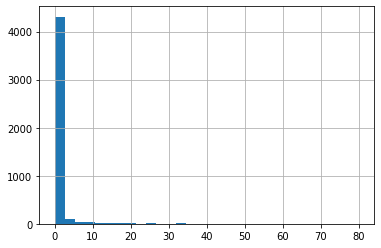

In [256]:
df_direct[df_direct['end_cologne'] == True]['ddelay'].hist(bins=30)

In [259]:
df

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6
...,...,...,...,...,...,...,...
289465,NJ 421,2022-05-14,Innsbruck Hbf,914,0,9999,0
289466,NJ 421,2022-05-14,Jenbach,853,1,855,1
289467,NJ 421,2022-05-14,Koblenz Hbf,2344,0,2346,0
289468,NJ 421,2022-05-14,Köln Hbf,2212,2,2216,1


<AxesSubplot:>

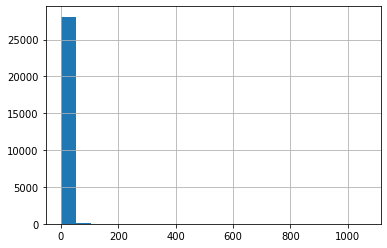

In [257]:
df_direct[df_direct['end_munich'] == True]['ddelay'].hist(bins=20)

In [234]:
delays_startcologne = df_direct[df_direct['ddelay'] > 5].count()[-1] / len(df_direct[df_direct['start_cologne'] == True]) * 100
delays_startcologne_avg = df_direct[df_direct['end_cologne'] == True].ddelay.mean()
delays_startmunich = df_direct[df_direct['ddelay'] > 5].count()[-2] / len(df_direct[df_direct['start_munich'] == True]) *100
delays_startmunich_avg = df_direct[df_direct['end_munich'] == True].ddelay.mean()
print(f'The average delay for trains ending in Munich is {round(delays_startcologne_avg,2)} minutes, and delays of over 5 minutes occurred in {round(delays_startcologne,2)}% of the trains')
print(f'The average delay for trains ending in Munich is {round(delays_startmunich_avg,2)} minutes, and delays of over 5 minutes occurred in {round(delays_startmunich,2)}% of the trains')

The average delay for trains starting in Munich is 1.93 minutes, and delays of over 5 minutes occurred in 8.85% of the trains
The average delay for trains starting in Munich is 1.96 minutes, and delays of over 5 minutes occurred in 7.86% of the trains


In [230]:
df_direct[df_direct['start_munich'] == True].ddelay.mean()

1.9590661358277608